In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.linalg as LA

from sklearn.linear_model import LogisticRegression


In [2]:
def CRPS(prob, actual):
    # prob is t*state_num matrix
    # actual is t*state_num matrix
    (prob-actual)

In [3]:
# Markov Chain Logistic Regression model for probabilistic modeling 
## energy = PI (temperature_t - temperature_t^ref)
## temperature_t = f(temperature_{t-1},energy_{t-1},occup_t,OAT_t)
## Hence, energy = f (temperature_{t-1},energy_{t-1},time_index_t) ...no outside temperature information

Energy = pd.read_excel('HVAC_Energy.xlsx',index_col='Timestamp')

In [4]:
Energy.columns=['energy','temp','temp_setpoint','SAF','dayofweek','minuteofhour','hourofday']
Energy

,energy,temp,temp_setpoint,SAF,dayofweek,minuteofhour,hourofday
Timestamp,,,,,,,
2018-09-15 00:00:00,36.607998,78.50,74.0,1.0,5,0,0
2018-09-15 00:10:00,105.087990,78.50,74.0,1.0,5,10,0
2018-09-15 00:20:00,59.135998,78.25,74.0,1.0,5,20,0
2018-09-15 00:30:00,59.071995,77.50,74.0,1.0,5,30,0
2018-09-15 00:40:00,59.071995,77.00,74.0,1.0,5,40,0
2018-09-15 00:50:00,57.663998,76.75,74.0,1.0,5,50,0
2018-09-15 01:00:00,73.855995,76.50,74.0,1.0,5,0,1
2018-09-15 01:10:00,60.671993,76.25,74.0,1.0,5,10,1
2018-09-15 01:20:00,60.607994,76.00,74.0,1.0,5,20,1


In [5]:
Energy_last_time = Energy.shift()

In [6]:
Energy_last_time.columns = ['energy_last','temp_last','temp_setpoint_last','SAF_last','dayofweek_last','minuteofhour_last','hourofday_last']
Energy_last_time

,energy_last,temp_last,temp_setpoint_last,SAF_last,dayofweek_last,minuteofhour_last,hourofday_last
Timestamp,,,,,,,
2018-09-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-15 00:10:00,36.607998,78.50,74.0,1.0,5.0,0.0,0.0
2018-09-15 00:20:00,105.087990,78.50,74.0,1.0,5.0,10.0,0.0
2018-09-15 00:30:00,59.135998,78.25,74.0,1.0,5.0,20.0,0.0
2018-09-15 00:40:00,59.071995,77.50,74.0,1.0,5.0,30.0,0.0
2018-09-15 00:50:00,59.071995,77.00,74.0,1.0,5.0,40.0,0.0
2018-09-15 01:00:00,57.663998,76.75,74.0,1.0,5.0,50.0,0.0
2018-09-15 01:10:00,73.855995,76.50,74.0,1.0,5.0,0.0,1.0
2018-09-15 01:20:00,60.671993,76.25,74.0,1.0,5.0,10.0,1.0


In [7]:
energy_feature = pd.concat([Energy,Energy_last_time],axis=1)
energy_feature

,energy,temp,temp_setpoint,SAF,dayofweek,minuteofhour,hourofday,energy_last,temp_last,temp_setpoint_last,SAF_last,dayofweek_last,minuteofhour_last,hourofday_last
Timestamp,,,,,,,,,,,,,,
2018-09-15 00:00:00,36.607998,78.50,74.0,1.0,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-15 00:10:00,105.087990,78.50,74.0,1.0,5,10,0,36.607998,78.50,74.0,1.0,5.0,0.0,0.0
2018-09-15 00:20:00,59.135998,78.25,74.0,1.0,5,20,0,105.087990,78.50,74.0,1.0,5.0,10.0,0.0
2018-09-15 00:30:00,59.071995,77.50,74.0,1.0,5,30,0,59.135998,78.25,74.0,1.0,5.0,20.0,0.0
2018-09-15 00:40:00,59.071995,77.00,74.0,1.0,5,40,0,59.071995,77.50,74.0,1.0,5.0,30.0,0.0
2018-09-15 00:50:00,57.663998,76.75,74.0,1.0,5,50,0,59.071995,77.00,74.0,1.0,5.0,40.0,0.0
2018-09-15 01:00:00,73.855995,76.50,74.0,1.0,5,0,1,57.663998,76.75,74.0,1.0,5.0,50.0,0.0
2018-09-15 01:10:00,60.671993,76.25,74.0,1.0,5,10,1,73.855995,76.50,74.0,1.0,5.0,0.0,1.0
2018-09-15 01:20:00,60.607994,76.00,74.0,1.0,5,20,1,60.671993,76.25,74.0,1.0,5.0,10.0,1.0


In [8]:
energy_feature.dropna(inplace=True)

In [9]:
energy_feature['energy_decile'],bins = pd.cut(energy_feature['energy'],10,labels=np.arange(0,10),retbins=True)
bins = bins.round(decimals=2)
energy_feature['energy_decile']

Timestamp
2018-09-15 00:10:00    6
2018-09-15 00:20:00    2
2018-09-15 00:30:00    2
2018-09-15 00:40:00    2
2018-09-15 00:50:00    2
2018-09-15 01:00:00    4
2018-09-15 01:10:00    3
2018-09-15 01:20:00    3
2018-09-15 01:30:00    6
2018-09-15 01:40:00    2
2018-09-15 01:50:00    2
2018-09-15 02:00:00    2
2018-09-15 02:10:00    6
2018-09-15 02:20:00    6
2018-09-15 02:30:00    3
2018-09-15 02:40:00    4
2018-09-15 02:50:00    3
2018-09-15 03:00:00    5
2018-09-15 03:10:00    3
2018-09-15 03:20:00    2
2018-09-15 03:30:00    2
2018-09-15 03:40:00    6
2018-09-15 03:50:00    2
2018-09-15 04:00:00    2
2018-09-15 04:10:00    2
2018-09-15 04:20:00    5
2018-09-15 04:30:00    2
2018-09-15 04:40:00    2
2018-09-15 04:50:00    2
2018-09-15 05:00:00    6
                      ..
2018-10-15 11:40:00    5
2018-10-15 11:50:00    4
2018-10-15 12:00:00    4
2018-10-15 12:10:00    4
2018-10-15 12:20:00    4
2018-10-15 12:30:00    5
2018-10-15 12:40:00    4
2018-10-15 12:50:00    7
2018-10-15 13:0

In [10]:
energy_feature['energy_decile'].value_counts()

3    1157
4     697
1     679
2     572
0     480
5     266
6     235
7     178
8      65
9      10
Name: energy_decile, dtype: int64

In [11]:
train_data = energy_feature['2018-09-15':'2018-10-13']
test_data = energy_feature['2018-10-14']


In [12]:
train_data['energy_decile'].value_counts()/train_data.shape[0]

3    0.273171
4    0.162195
1    0.151220
2    0.131220
0    0.106341
5    0.061707
6    0.056098
7    0.040732
8    0.014878
9    0.002439
Name: energy_decile, dtype: float64

In [13]:
state_col = energy_feature.columns.get_loc('energy_decile')
state_num = bins.shape[0]-1

In [14]:
test_data

,energy,temp,temp_setpoint,SAF,dayofweek,minuteofhour,hourofday,energy_last,temp_last,temp_setpoint_last,SAF_last,dayofweek_last,minuteofhour_last,hourofday_last,energy_decile
Timestamp,,,,,,,,,,,,,,,
2018-10-14 00:00:00,35.903996,78.50,74.0,1.0,6,0,0,35.519997,78.50,74.0,1.0,5.0,50.0,23.0,0
2018-10-14 00:10:00,100.415993,78.00,74.0,1.0,6,10,0,35.903996,78.50,74.0,1.0,6.0,0.0,0.0,6
2018-10-14 00:20:00,74.303993,76.75,74.0,1.0,6,20,0,100.415993,78.00,74.0,1.0,6.0,10.0,0.0,4
2018-10-14 00:30:00,60.159992,76.00,74.0,1.0,6,30,0,74.303993,76.75,74.0,1.0,6.0,20.0,0.0,2
2018-10-14 00:40:00,60.927998,75.50,74.0,1.0,6,40,0,60.159992,76.00,74.0,1.0,6.0,30.0,0.0,3
2018-10-14 00:50:00,58.879993,75.00,74.0,1.0,6,50,0,60.927998,75.50,74.0,1.0,6.0,40.0,0.0,2
2018-10-14 01:00:00,58.751995,74.75,74.0,1.0,6,0,1,58.879993,75.00,74.0,1.0,6.0,50.0,0.0,2
2018-10-14 01:10:00,59.583996,74.50,74.0,1.0,6,10,1,58.751995,74.75,74.0,1.0,6.0,0.0,1.0,2
2018-10-14 01:20:00,61.055996,74.25,74.0,1.0,6,20,1,59.583996,74.50,74.0,1.0,6.0,10.0,1.0,3


In [15]:
def count_transition(df,col_num,state_num):
    count_matrix = np.zeros((state_num, state_num))
    for id in df.index[:-1]:
        i = df.iloc[df.index.get_loc(id),col_num]
        j = df.iloc[df.index.get_loc(id)+1,col_num]
        count_matrix[i,j] += 1
    return count_matrix

In [16]:
transition_count = count_transition(train_data,state_col,state_num)
denominator = np.tile(np.sum(transition_count,axis=1).reshape(state_num,1),state_num)
transition_prob = np.divide(transition_count,denominator)
transition_count

array([[357.,  70.,   2.,   4.,   0.,   0.,   1.,   1.,   0.,   0.],
       [ 67., 519.,  13.,   8.,   3.,   1.,   2.,   7.,   0.,   0.],
       [  7.,  12., 390.,  40.,   6.,   9.,  70.,   4.,   0.,   0.],
       [  3.,  10.,  54., 752.,  77.,  32.,  92.,  96.,   4.,   0.],
       [  1.,   1.,   6.,  73., 397.,  88.,  24.,  33.,  36.,   6.],
       [  0.,   1.,   7.,  36.,  95.,  75.,  17.,   2.,  16.,   4.],
       [  1.,   4.,  63.,  97.,  26.,  14.,  16.,   7.,   2.,   0.],
       [  0.,   3.,   3., 108.,  27.,   7.,   5.,  14.,   0.,   0.],
       [  0.,   0.,   0.,   2.,  27.,  25.,   2.,   2.,   3.,   0.],
       [  0.,   0.,   0.,   0.,   7.,   2.,   0.,   1.,   0.,   0.]])

In [17]:
np.sum(transition_count,axis=1)

array([ 435.,  620.,  538., 1120.,  665.,  253.,  230.,  167.,   61.,
         10.])

In [50]:
eigs = LA.eig(transition_prob)
eigs[1]

array([[ 3.16227766e-01+0.00000000e+00j,  6.15137363e-01+0.00000000e+00j,
         1.31821486e-01+0.00000000e+00j, -7.87537461e-01+0.00000000e+00j,
        -2.72110775e-02+0.00000000e+00j,  4.80988251e-04+0.00000000e+00j,
         1.24266787e-04+1.76916309e-04j,  1.24266787e-04-1.76916309e-04j,
         3.52963091e-04-3.28604732e-04j,  3.52963091e-04+3.28604732e-04j],
       [ 3.16227766e-01+0.00000000e+00j,  5.10074598e-01+0.00000000e+00j,
        -4.00171036e-02+0.00000000e+00j,  6.11765475e-01+0.00000000e+00j,
         1.25901496e-02+0.00000000e+00j, -2.58217325e-03+0.00000000e+00j,
         1.03815621e-03+2.93354082e-03j,  1.03815621e-03-2.93354082e-03j,
        -3.01014248e-03+2.89642341e-03j, -3.01014248e-03-2.89642341e-03j],
       [ 3.16227766e-01+0.00000000e+00j, -1.18785770e-01+0.00000000e+00j,
        -6.01900636e-01+0.00000000e+00j, -6.92602386e-02+0.00000000e+00j,
        -3.18372797e-01+0.00000000e+00j,  2.20270096e-02+0.00000000e+00j,
         1.03409973e-02+4.95018202e-

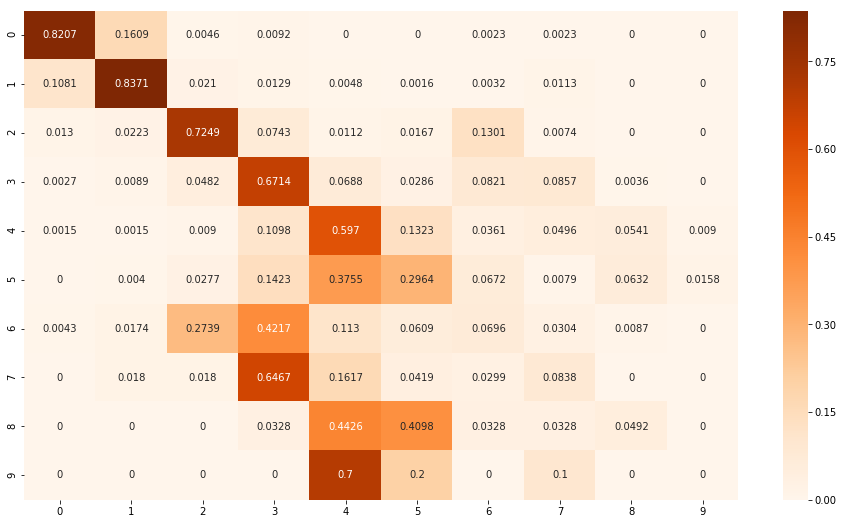

In [19]:
fig1 = plt.figure(figsize=(16,9))
sns.heatmap(np.round(transition_prob,decimals=4), annot=True, fmt="g", cmap='Oranges')
plt.show()

In [20]:
def calc_future_prob(initial_state,transition_prob,time_step):
    num_state = transition_prob.shape[0]
    prob = np.zeros(shape=(time_step,num_state))
    prob[0,initial_state] = 1
    for t in np.arange(1,time_step):
        prob[t,:] = np.matmul(prob[t-1,:],transition_prob)
    return prob

In [21]:
""" wikipedia markov chain example 

init = 1
A = np.array([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]])
step = 100
prob = calc_future_prob(init,A,step)
prob[99,:]

"""


' wikipedia markov chain example \n\ninit = 1\nA = np.array([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]])\nstep = 100\nprob = calc_future_prob(init,A,step)\nprob[99,:]\n\n'

In [22]:
# Note this is multi-step Markov Chain

initial_state = train_data['energy_decile'].tail(1)
time_step = 300
prob = calc_future_prob(initial_state,transition_prob,time_step)

In [41]:
transition_prob

array([[3.72301508e-01, 1.07905583e-04, 2.05448840e-12, 6.57436288e-11,
        0.00000000e+00, 0.00000000e+00, 6.42027625e-14, 6.42027625e-14,
        0.00000000e+00, 0.00000000e+00],
       [1.47372200e-05, 4.11034562e-01, 4.05282932e-09, 3.57677390e-10,
        2.65245379e-12, 1.09154477e-14, 3.49294326e-13, 1.83455929e-10,
        0.00000000e+00, 0.00000000e+00],
       [3.72888356e-10, 5.52070895e-09, 2.00175839e-01, 2.27189669e-06,
        1.72522155e-10, 1.31009011e-09, 3.72888356e-05, 2.27189669e-11,
        0.00000000e+00, 0.00000000e+00],
       [1.37884726e-13, 5.67426856e-11, 2.60542566e-07, 1.36458028e-01,
        1.53590202e-06, 1.90396858e-08, 3.73980556e-06, 4.62664366e-06,
        5.81045100e-13, 0.00000000e+00],
       [7.68938796e-15, 7.68938796e-15, 5.97926808e-11, 1.59406518e-05,
        7.58305677e-02, 4.05793545e-05, 6.12277051e-08, 3.00927220e-07,
        4.64947886e-07, 5.97926808e-11],
       [0.00000000e+00, 9.64711363e-13, 1.62139039e-08, 5.83324071e-05,
   

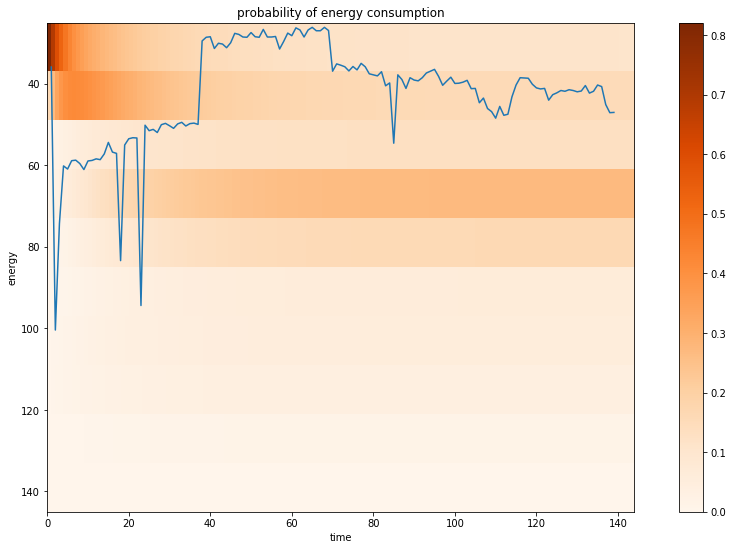

In [24]:
fig2 = plt.figure(figsize=(16,9))
ax = plt.subplot()
plt.imshow(prob[1:144,:].T,interpolation='nearest',cmap='Oranges', extent=[0,144,145,25])
plt.plot(np.arange(1,140),test_data['energy'].head(140))
plt.xlabel('time')
plt.ylabel('energy')
plt.title('probability of energy consumption')
#plt.xticks(ticks=np.arange(1,145),labels=np.arange(1,3,145))
#ax.set_yticks([5,10,20])
plt.colorbar()

In [25]:
# Calculate single-step markov chain
num_state = transition_prob.shape[0]
time_step = test_data.shape[0]
prob_MC = np.zeros(shape=(time_step,num_state))
for t in np.arange(0,time_step):
    state_last = test_data.loc[test_data.index[t],'energy_decile']
    prob_MC[t,:] = transition_prob[state_last,:]


    


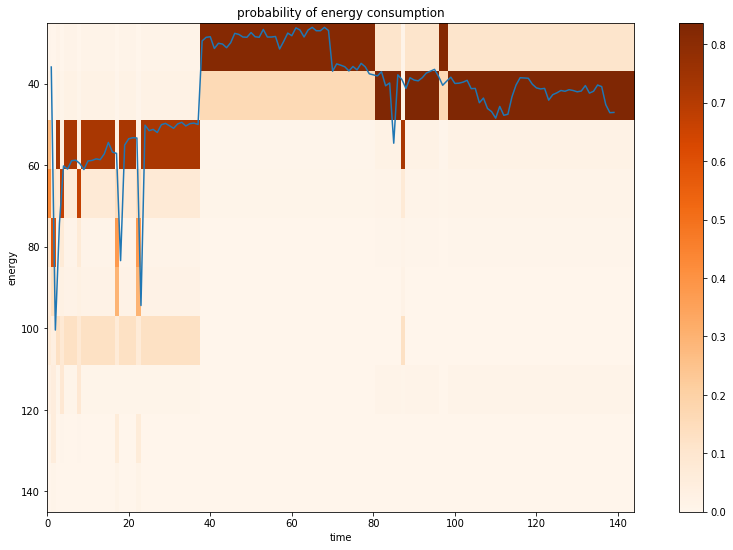

In [26]:
fig3 = plt.figure(figsize=(16,9))
plt.imshow(prob_MC[1:144,:].T,interpolation='nearest',cmap='Oranges', extent=[0,144,145,25])
plt.plot(np.arange(1,140),test_data['energy'].head(140))
plt.xlabel('time')
plt.ylabel('energy')
plt.title('probability of energy consumption')
#plt.xticks(ticks=np.arange(1,145),labels=np.arange(1,3,145))
#ax.set_yticks([5,10,20])
plt.colorbar()

In [27]:
# Markov Chain Logistic Regression where transition probability is a linear model of features. 
# energy = f (temp_sp_t, temperature_{t-1},energy_{t-1},time_index_t)

# NOTE: this is actually one-step probabilistic forecasting

LR_model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=14000)


In [28]:
features = ['temp_setpoint','dayofweek','minuteofhour','hourofday' ]#,'energy_last','temp_last']
LR_model = LR_model.fit(X=train_data[features],y=train_data['energy_decile'])



In [29]:
trans_prob_LR = LR_model.predict_proba(test_data.loc[test_data.index[0:144],features])
trans_prob_LR.shape

(139, 10)

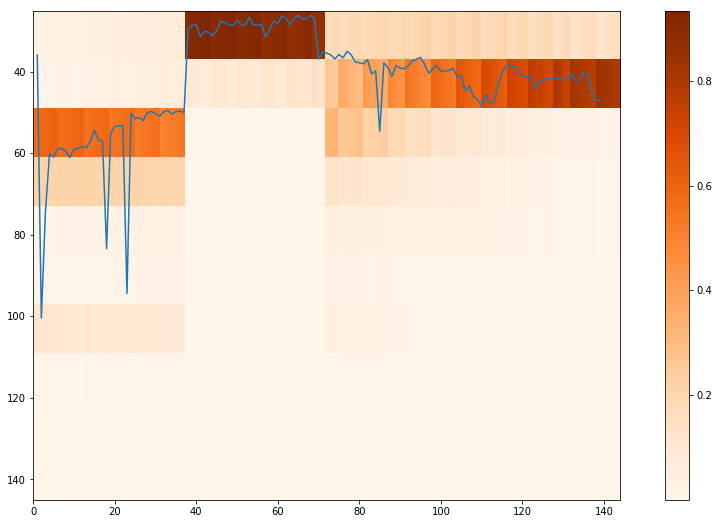

In [30]:
# plot LRMC results
fig4 = plt.figure(figsize=(16,9))
plt.imshow(trans_prob_LR.transpose(),cmap='Oranges',interpolation='nearest',extent=[0,144,145,25])
plt.plot(np.arange(1,140),test_data['energy'].head(140))
plt.colorbar()

In [31]:
# Note: The following is multi-step forecasting
time_step = test_data.shape[0]
sub_features = ['temp_setpoint','dayofweek','minuteofhour','hourofday']
LR_model_subfeatures = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=14000)
LR_model_subfeatures = LR_model.fit(X=train_data[sub_features],y=train_data['energy_decile'])
prob_LR_multistep = LR_model.predict_proba(test_data.loc[test_data.index[0:time_step],sub_features])
prob_LR_multistep.shape

(139, 10)

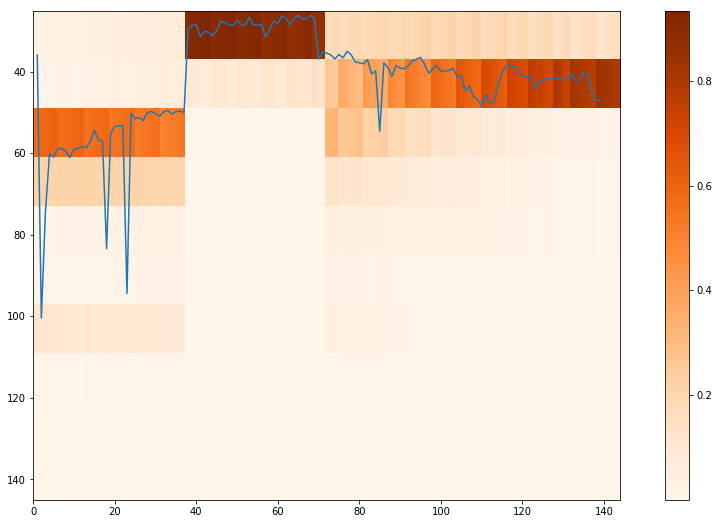

In [32]:
fig5 = plt.figure(figsize=(16,9))
plt.imshow(prob_LR_multistep.T,cmap='Oranges',interpolation='nearest',extent=[0,144,145,25])
plt.plot(np.arange(1,140),test_data['energy'].head(140))
plt.colorbar()

In [33]:
feature_columns =['temp_setpoint','dayofweek','minuteofhour','hourofday',
                  'energy_last','temp_last','temp_setpoint_last','SAF_last',
                  'dayofweek_last','minuteofhour_last','hourofday_last']
x_train = train_data[feature_columns]
y_train = train_data['energy']

In [34]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(x_train,y_train)
lasso = linear_model.Lasso(alpha=1).fit(x_train,y_train)

In [35]:
# one-step prediction
x_test = test_data[feature_columns]
y_test = test_data['energy']
y_predict_reg = reg.predict(x_test)
y_predict_lasso = lasso.predict(x_test)

Text(0.5, 1.0, 'Regression Models of Energy Conumption')

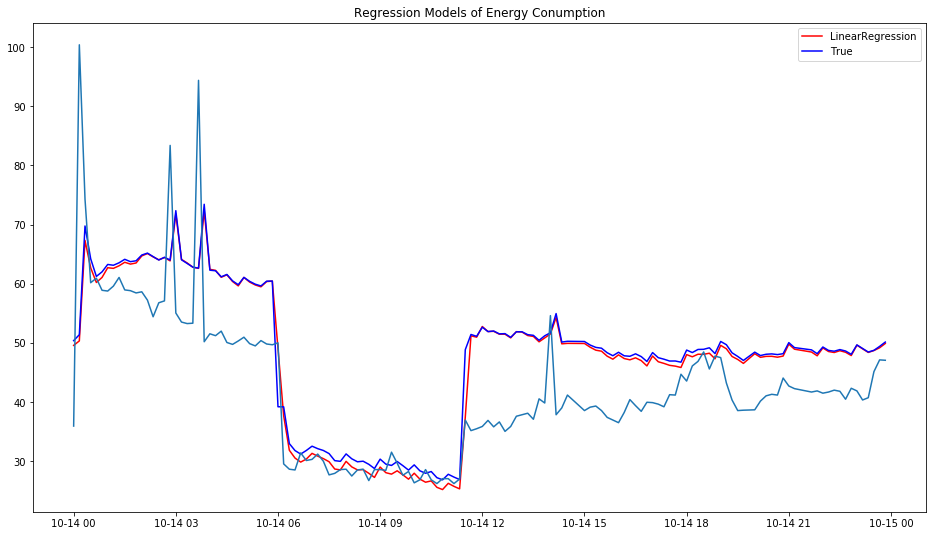

In [36]:
# plot
plt.figure(figsize=(16,9))
plt.plot(test_data.index, y_predict_reg,'r',test_data.index, y_predict_lasso,'b',test_data.index, y_test )
plt.legend(['LinearRegression','True'])
plt.title('Regression Models of Energy Conumption')

In [37]:
y_predict = np.zeros(shape=(time_step,1))
y_predict

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [38]:
test_data.index.tolist()

[Timestamp('2018-10-14 00:00:00'),
 Timestamp('2018-10-14 00:10:00'),
 Timestamp('2018-10-14 00:20:00'),
 Timestamp('2018-10-14 00:30:00'),
 Timestamp('2018-10-14 00:40:00'),
 Timestamp('2018-10-14 00:50:00'),
 Timestamp('2018-10-14 01:00:00'),
 Timestamp('2018-10-14 01:10:00'),
 Timestamp('2018-10-14 01:20:00'),
 Timestamp('2018-10-14 01:30:00'),
 Timestamp('2018-10-14 01:40:00'),
 Timestamp('2018-10-14 01:50:00'),
 Timestamp('2018-10-14 02:00:00'),
 Timestamp('2018-10-14 02:10:00'),
 Timestamp('2018-10-14 02:20:00'),
 Timestamp('2018-10-14 02:30:00'),
 Timestamp('2018-10-14 02:40:00'),
 Timestamp('2018-10-14 02:50:00'),
 Timestamp('2018-10-14 03:00:00'),
 Timestamp('2018-10-14 03:10:00'),
 Timestamp('2018-10-14 03:20:00'),
 Timestamp('2018-10-14 03:30:00'),
 Timestamp('2018-10-14 03:40:00'),
 Timestamp('2018-10-14 03:50:00'),
 Timestamp('2018-10-14 04:00:00'),
 Timestamp('2018-10-14 04:10:00'),
 Timestamp('2018-10-14 04:20:00'),
 Timestamp('2018-10-14 04:30:00'),
 Timestamp('2018-10-